In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CommViolPredUnnormalizedData.txt')
df.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [3]:
df = df.replace('?', np.nan)

In [4]:
df = df.rename(columns={'racepctblack': 'racePctBlack'})

races = ['Black', 'White', 'Asian', 'Hisp']

for race in races:
    df['raceCnt' + race] = (df['population'] * df['racePct' + race]).astype(int)
    

df[['population'] + ['racePct' + race for race in races] + ['raceCnt' + race for race in races]].head()

,population,racePctBlack,racePctWhite,racePctAsian,racePctHisp,raceCntBlack,raceCntWhite,raceCntAsian,raceCntHisp
0,11980,1.37,91.78,6.50,1.88,16412,1099524,77870,22522
1,23123,0.80,95.57,3.44,0.85,18498,2209865,79543,19654
2,29344,0.74,94.33,3.43,2.35,21714,2768019,100649,68958
3,16656,1.70,97.35,0.50,0.70,28315,1621461,8328,11659
4,11245,0.53,89.16,1.17,0.52,5959,1002604,13156,5847


In [5]:
group_state_df = df.groupby('state')
group_state_df.sum()[['raceCnt' + race for race in races]]

,raceCntBlack,raceCntWhite,raceCntAsian,raceCntHisp
state,,,,
AK,1884236,22662954,1307410,1166250
AL,60175035,106301268,1543706,1223425
AR,18430930,61759742,843737,777175
AZ,9502627,209704042,4700791,47822877
CA,189412267,1453887217,256155367,602484014
CO,11598582,164297291,4463645,27575767
CT,26312977,217639229,4306311,19961762
DC,39958296,17964240,1122765,3271191
DE,854319,1810593,54983,77916


In [6]:
df.describe()

,fold,population,householdsize,racePctBlack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,raceCntBlack,raceCntWhite,raceCntAsian,raceCntHisp
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2.215000e+03,2.215000e+03,2.215000e+03
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296,8.911116e+05,3.840638e+06,2.226873e+05,7.029399e+05
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829,6.114322e+06,1.105153e+07,1.535816e+06,5.420308e+06
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.284800e+04,6.400000e+02,1.543000e+03
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,7.300000,1181.900000,0.360000,0.000000,0.000000,0.000000,1.760450e+04,1.250572e+06,1.170550e+04,1.833550e+04
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,13.700000,2027.300000,1.220000,0.000000,1.000000,2.170000,7.935700e+04,1.933021e+06,3.076900e+04,5.574600e+04
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,26.100000,3321.700000,3.365000,0.000000,3.000000,8.365000,3.431325e+05,3.466470e+06,1.057720e+05,2.675595e+05
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000,2.102308e+08,3.826772e+08,5.125795e+07,1.783777e+08


In [7]:
crime_df = df[['burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']]
crime_df

,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,nonViolPerPop
0,114.85,1132.08,131.26,16.41,1394.59
1,242.37,1598.78,110.55,4.25,1955.95
2,758.14,4972.19,376.3,60.87,6167.51
3,1301.78,4142.56,271.93,NaN,NaN
4,728.93,8490.87,728.93,40.05,9988.79
...,...,...,...,...,...
2210,2268.72,4225.82,806.25,56.06,7356.84
2211,860.43,4748.9,198.56,16.55,5824.44
2212,1709.26,2435.97,487.19,21.77,4654.2
2213,1508.01,3722.9,102.1,7.85,5340.87


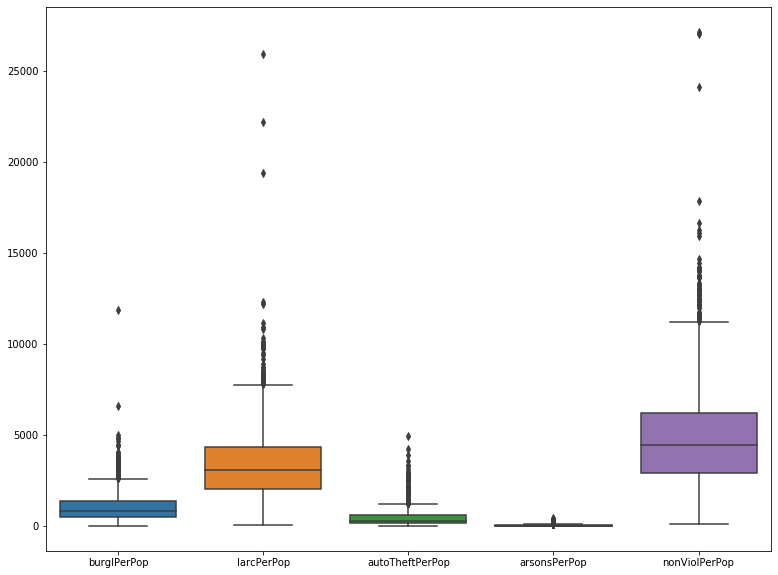

In [8]:
f, ax = plt.subplots(figsize=(13, 10))
sns.boxplot(data=crime_df)
plt.show()

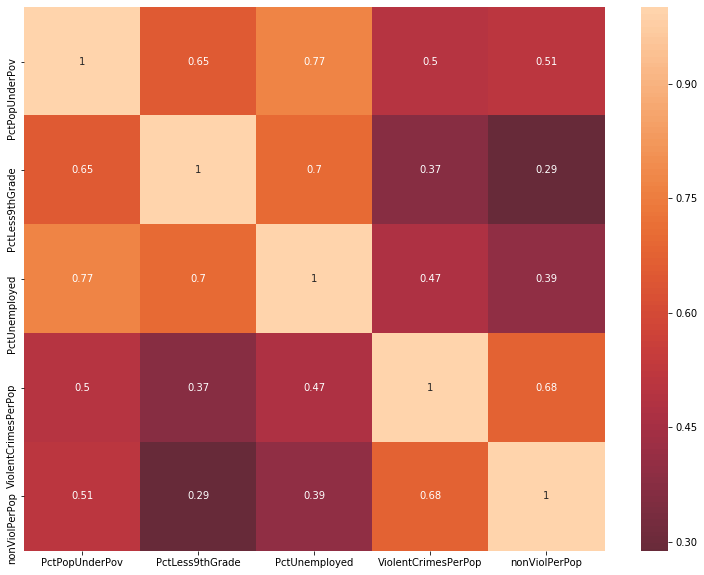

In [9]:
feature_columns = ['PctPopUnderPov', 'PctLess9thGrade', 'PctUnemployed', 'ViolentCrimesPerPop', 'nonViolPerPop']
filtered_df = df[feature_columns]

f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(filtered_df.dropna().astype(float).corr(), center=0, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()